In [1]:
#本地文件读取数据

from jaqs_fxdayu.data import DataView
from jaqs_fxdayu.data import LocalDataService
from jaqs_fxdayu.util import dp

ds = LocalDataService(r'E://股票因子数据/data')
start = 20100101
end = 20161231

factor = ['index_member','close','pb','float_mv','net_profit','pe','volume','capital_stk','tot_profit','less_int_exp','int_income','total_liab','end_bal_cash','tot_assets']
check_factor = ','.join(factor)

dv_props = {'start_date': start, 'end_date': end, 'universe':"000905.SH,000300.SH",
         'fields': check_factor,
         'freq': 1,
         "prepare_fields": True}
    
dv = DataView()
dv.init_from_config(dv_props, data_api=ds)
dv.prepare_data()

More than one universe are used: ['000905.SH', '000300.SH'], use the first one (000905.SH) as index by default. If you want to use other benchmark, please specify benchmark in configs.
Initialize config success.
Query data...
Query data - query...
NOTE: price adjust method is [post adjust]
当前请求daily...
{'adjust_mode': None, 'fields': 'open,close_adj,low,open_adj,vwap_adj,volume,index_member,symbol,vwap,low_adj,trade_date,trade_status,close,high,high_adj'}
下载进度287/1338.
下载进度574/1338.
下载进度861/1338.
下载进度1148/1338.
当前请求daily...
{'adjust_mode': 'post', 'fields': 'open,low,vwap,close,high,symbol,trade_date'}
下载进度287/1338.
下载进度574/1338.
下载进度861/1338.
下载进度1148/1338.


e:\python\lib\site-packages\jaqs_fxdayu\data\dataview.py:248: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  daily_list.append(df_daily.loc[:, fields_market_daily])
e:\python\lib\site-packages\pandas\core\indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


当前请求query_lb_dailyindicator...
{'fields': 'symbol,trade_date,pe,float_mv,pb'}


e:\python\lib\site-packages\jaqs_fxdayu\data\dataservice.py:277: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
  df = df.rename_axis(dic,axis=1)


下载进度287/1338.
下载进度574/1338.
下载进度861/1338.
下载进度1148/1338.
Query data - daily fields prepared.
    At fields 000024.SZ, 000522.SZ, 000527.SZ, 000562.SZ, 000602.SZ, 000748.SZ, 600001.SH, 600005.SH, 600087.SH, 600102.SH, 600263.SH, 600357.SH, 600553.SH, 600607.SH, 600631.SH, 600832.SH, 600991.SH, 601268.SH, 601299.SH
Query data - quarterly fields prepared.
Query instrument info...
Query adj_factor...
Query benchmark...
Query benchmar member info...
Field [index_member] is overwritten.
Data has been successfully prepared.


In [2]:
dv.add_field('sw1')

True

In [3]:
sw1 = dv.get_ts('sw1')
dict_classify = {'480000': '银行', '430000': '房地产', '460000': '休闲服务', '640000': '机械设备', '240000': '有色金属', '510000': '综合', '410000': '公用事业', '450000': '商业贸易', '730000': '通信', '330000': '家用电器', '720000': '传媒', '630000': '电气设备', '270000': '电子', '490000': '非银金融', '370000': '医药生物', '710000': '计算机', '280000': '汽车', '340000': '食品饮料', '220000': '化工', '210000': '采掘', '230000': '钢铁', '650000': '国防军工', '110000': '农林牧渔', '420000': '交通运输', '620000': '建筑装饰', '350000': '纺织服装', '610000': '建筑材料', '360000': '轻工制造'}
sw1_name = sw1.replace(dict_classify)

In [4]:
EBIT_EV=dv.add_formula('EBIT_EV', '(tot_profit+less_int_exp-int_income)/(capital_stk*Ts_Mean(close,60)+total_liab-end_bal_cash)',overwrite=True, is_quarterly=False, add_data=True)

e:\python\lib\site-packages\jaqs\data\py_expression_eval.py:605: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=60,center=False).mean()
  return pd.rolling_mean(x, n)


In [5]:
vr_vol24=dv.add_formula('vr_vol24','-(Ts_Sum(If(close>Delay(close,1),volume,0),24)+Ts_Sum(If(close>Delay(close,1),volume,0),24))/(Ts_Sum(If(close<Delay(close,1),volume,0),24)+Ts_Sum(If(close>Delay(close,1),volume,0),24))*Ts_Mean(volume,24)/capital_stk',overwrite=True, is_quarterly=False, add_data=True)

e:\python\lib\site-packages\jaqs\data\py_expression_eval.py:477: RuntimeWarning: invalid value encountered in greater
  res = arr > brr
e:\python\lib\site-packages\jaqs\data\py_expression_eval.py:584: FutureWarning: pd.rolling_sum is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=24,center=False).sum()
  return pd.rolling_sum(x, n)
e:\python\lib\site-packages\jaqs\data\py_expression_eval.py:486: RuntimeWarning: invalid value encountered in less
  res = arr < brr
e:\python\lib\site-packages\jaqs\data\py_expression_eval.py:605: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=24,center=False).mean()
  return pd.rolling_mean(x, n)


In [6]:
EV_pe_pb=dv.add_formula('EV_pe_pb', "Log((capital_stk*Ts_Mean(close,60)+total_liab-end_bal_cash))/(pb*pe)",overwrite=True, is_quarterly=False, add_data=True)

e:\python\lib\site-packages\jaqs\data\py_expression_eval.py:605: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=60,center=False).mean()
  return pd.rolling_mean(x, n)
e:\python\lib\site-packages\jaqs\data\py_expression_eval.py:1212: RuntimeWarning: divide by zero encountered in log
  nstack.append(f(n1))


In [7]:
import numpy as np

def mask_index_member():
    df_index_member = dv.get_ts('index_member')
    mask_index_member = ~(df_index_member >0) #定义信号过滤条件-非指数成分
    return mask_index_member

# 定义可买卖条件——未停牌、未涨跌停
def limit_up_down():
    trade_status = dv.get_ts('trade_status').fillna(0)
    mask_sus = trade_status == 0
    # 涨停
    up_limit = dv.add_formula('up_limit', '(close - Delay(close, 1)) / Delay(close, 1) > 0.095', is_quarterly=False)
    # 跌停
    down_limit = dv.add_formula('down_limit', '(close - Delay(close, 1)) / Delay(close, 1) < -0.095', is_quarterly=False)
    can_enter = np.logical_and(up_limit < 1, ~mask_sus) # 未涨停未停牌
    can_exit = np.logical_and(down_limit < 1, ~mask_sus) # 未跌停未停牌
    return can_enter,can_exit

mask = mask_index_member()
can_enter,can_exit = limit_up_down()

e:\python\lib\site-packages\jaqs\data\py_expression_eval.py:477: RuntimeWarning: invalid value encountered in greater
  res = arr > brr
e:\python\lib\site-packages\jaqs\data\py_expression_eval.py:486: RuntimeWarning: invalid value encountered in less
  res = arr < brr


In [8]:
#############################对因子进行比较筛选
from jaqs_fxdayu.research.signaldigger import multi_factor

ic = dict()
factors_dict = {signal:dv.get_ts(signal) for signal in ["EBIT_EV","vr_vol24","EV_pe_pb"]}
for period in [20]:
    ic[period]=multi_factor.get_factors_ic_df(factors_dict,
                                              price=dv.get_ts("close_adj"),
                                              high=dv.get_ts("high_adj"), # 可为空
                                              low=dv.get_ts("low_adj"),# 可为空
                                              n_quantiles=5,# quantile分类数
                                              mask = mask,# 过滤条件
                                              can_enter=can_enter,# 是否能进场
                                              can_exit=can_exit,# 是否能出场
                                              period=period,# 持有期
                                              benchmark_price=dv.data_benchmark, # 基准价格 可不传入，持有期收益（return）计算为绝对收益
                                              commission = 0.0008,
                                              )

e:\python\lib\importlib\__init__.py:126: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  return _bootstrap._gcd_import(name[level:], package, level)
e:\python\lib\site-packages\jaqs\research\signaldigger\plotting.py:10: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "e:\python\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "e:\python\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "e:\python\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "e:\python\lib\site-packages\traitlets\config\application

Nan Data Count (should be zero) : 0;  Percentage of effective data: 54%


e:\python\lib\site-packages\numpy\lib\function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
e:\python\lib\site-packages\numpy\lib\function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
e:\python\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
e:\python\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
e:\python\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Nan Data Count (should be zero) : 0;  Percentage of effective data: 54%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 52%


In [9]:
import pandas as pd
ic_mean_table = pd.DataFrame(data=np.nan,columns=[20],index=["EBIT_EV","vr_vol24","EV_pe_pb"])
ic_std_table = pd.DataFrame(data=np.nan,columns=[20],index=["EBIT_EV","vr_vol24","EV_pe_pb"])
ir_table = pd.DataFrame(data=np.nan,columns=[20],index=["EBIT_EV","vr_vol24","EV_pe_pb"])
for signal in ["EBIT_EV","vr_vol24","EV_pe_pb"]:
    for period in [20]:
        ic_mean_table.loc[signal,period]=ic[period][signal].mean()
        ic_std_table.loc[signal,period]=ic[period][signal].std()
        ir_table.loc[signal,period]=ic[period][signal].mean()/ic[period][signal].std()

print(ic_mean_table)
print(ic_std_table)
print(ir_table)

                20
EBIT_EV   0.025976
vr_vol24  0.058671
EV_pe_pb  0.036485
                20
EBIT_EV   0.104631
vr_vol24  0.172823
EV_pe_pb  0.218416
                20
EBIT_EV   0.248262
vr_vol24  0.339484
EV_pe_pb  0.167042


In [10]:
from jaqs_fxdayu.research.signaldigger import process

factor_dict = dict()
# index_member = mask
# index_member 是 index_member，mask是mask，数值上来看，这里的mask恰好是index_member取反
for name in ["EBIT_EV","vr_vol24","EV_pe_pb"]:
    signal = 1*dv.get_ts(name) # 调整符号
    process.winsorize(factor_df=signal,alpha=0.05,index_member=dv.get_ts("index_member"))#去极值
    
    # 行业市值中性化
    signal = process.neutralize(signal,
                                group=dv.get_ts("sw1"),# 行业分类标准
                                float_mv = dv.get_ts("float_mv"), #流通市值 可为None 则不进行市值中性化
                                index_member=dv.get_ts("index_member"),# 是否只处理时只考虑指数成份股
                               )
    signal = process.standardize(signal,dv.get_ts("index_member")) #z-score标准化 保留排序信息和分布信息
    factor_dict[name] = signal

e:\python\lib\site-packages\jaqs_fxdayu\research\signaldigger\process.py:168: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m = np.linalg.lstsq(x, y)[0]


In [11]:
# rollback_period代表滚动窗口所用到的天数,即用前多少期的数据来计算现阶段的因子权重。 通常建议设置时间在半年以上,可以获得相对稳定的预期结果

#  多因子组合-动态加权参数配置
props = {
    'price':dv.get_ts("close_adj"),
    'high':dv.get_ts("high_adj"), # 可为空
    'low':dv.get_ts("low_adj"),# 可为空
    'ret_type': 'return',#可选参数还有upside_ret/downside_ret 则组合因子将以优化潜在上行、下行空间为目标
    'benchmark_price': dv.data_benchmark,  # 为空计算的是绝对收益　不为空计算相对收益
    'period': 20, # 20天的持有期
    'mask': mask,
    'can_enter': can_enter,
    'can_exit': can_exit,
    'forward': True,
    'commission': 0.0008,
    "covariance_type": "shrink",  # 协方差矩阵估算方法 还可以为"simple"
    "rollback_period": 120}  # 滚动窗口天数

In [12]:
comb_factors = dict()
for method in ["equal_weight","ic_weight","ir_weight","max_IR","max_IC"]:
    comb_factors[method] = multi_factor.combine_factors(factor_dict,
                                                        standardize_type="z_score",
                                                        winsorization=False,
                                                        weighted_method=method,
                                                        props=props)
    print(method)
    print(comb_factors[method].dropna(how="all").head())

equal_weight
symbol      000001.SZ  000002.SZ  000005.SZ  000006.SZ  000008.SZ  000009.SZ  \
trade_date                                                                     
20100129     0.032504        NaN  -2.180836        NaN        NaN        NaN   
20100201     0.028937        NaN  -2.687787        NaN        NaN        NaN   
20100202     0.025852        NaN  -2.653222        NaN        NaN        NaN   
20100203     0.030476        NaN  -2.032540        NaN        NaN        NaN   
20100204     0.026638        NaN  -2.261302        NaN        NaN        NaN   

symbol      000012.SZ  000016.SZ  000021.SZ  000022.SZ    ...      603698.SH  \
trade_date                                                ...                  
20100129          NaN        NaN        NaN        NaN    ...            NaN   
20100201          NaN        NaN        NaN        NaN    ...            NaN   
20100202          NaN        NaN        NaN        NaN    ...            NaN   
20100203          NaN     

e:\python\lib\site-packages\jaqs\util\numeric.py:16: RuntimeWarning: divide by zero encountered in true_divide
  res = np.floor(rank / divisor) + 1.0
e:\python\lib\site-packages\jaqs\util\numeric.py:16: RuntimeWarning: invalid value encountered in true_divide
  res = np.floor(rank / divisor) + 1.0


Nan Data Count (should be zero) : 0;  Percentage of effective data: 54%


e:\python\lib\site-packages\numpy\lib\function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
e:\python\lib\site-packages\numpy\lib\function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
e:\python\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
e:\python\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
e:\python\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Nan Data Count (should be zero) : 0;  Percentage of effective data: 54%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 52%


e:\python\lib\site-packages\jaqs_fxdayu\research\signaldigger\multi_factor.py:406: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  weight = np.array(weight.reshape(len(weight), ))


ic_weight
symbol      000001.SZ  000002.SZ  000005.SZ  000006.SZ  000008.SZ  000009.SZ  \
trade_date                                                                     
20100730     0.027205  -0.377354        NaN  -2.752405        NaN   0.375947   
20100802          NaN  -0.372853        NaN  -2.901054        NaN   0.378544   
20100803          NaN  -0.401157        NaN  -2.851955        NaN   0.318071   
20100804          NaN  -0.388584        NaN  -2.629511        NaN   0.315320   
20100805          NaN  -0.422623        NaN  -2.772084        NaN   0.300969   

symbol      000012.SZ  000016.SZ  000021.SZ  000022.SZ    ...      603698.SH  \
trade_date                                                ...                  
20100730     1.473962  -0.683744  -0.788791        NaN    ...            NaN   
20100802     1.437751  -0.647892  -0.739042        NaN    ...            NaN   
20100803     1.447721  -0.611594  -0.707421        NaN    ...            NaN   
20100804     1.452493  -0.605

e:\python\lib\site-packages\jaqs_fxdayu\research\signaldigger\multi_factor.py:480: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  weight = np.array(weight.reshape(len(weight), ))


ir_weight
symbol      000001.SZ  000002.SZ  000005.SZ  000006.SZ  000008.SZ  000009.SZ  \
trade_date                                                                     
20100730    -0.131559  -0.434389        NaN  -1.929443        NaN   0.293888   
20100802          NaN  -0.425131        NaN  -2.015022        NaN   0.287812   
20100803          NaN  -0.455287        NaN  -1.981244        NaN   0.222245   
20100804          NaN  -0.436535        NaN  -1.817269        NaN   0.215965   
20100805          NaN  -0.448173        NaN  -1.908731        NaN   0.202562   

symbol      000012.SZ  000016.SZ  000021.SZ  000022.SZ    ...      603698.SH  \
trade_date                                                ...                  
20100730     1.430509  -0.558957  -0.579913        NaN    ...            NaN   
20100802     1.377622  -0.521340  -0.543847        NaN    ...            NaN   
20100803     1.379266  -0.474511  -0.524253        NaN    ...            NaN   
20100804     1.371966  -0.464

In [13]:
period = 20
ic_20  =   multi_factor.get_factors_ic_df(comb_factors,
                                          price=dv.get_ts("close_adj"),
                                          high=dv.get_ts("high_adj"), # 可为空
                                          low=dv.get_ts("low_adj"),# 可为空
                                          n_quantiles=5,# quantile分类数
                                          mask=mask,# 过滤条件
                                          can_enter=can_enter,# 是否能进场
                                          can_exit=can_exit,# 是否能出场
                                          period=period,# 持有期
                                          benchmark_price=dv.data_benchmark, # 基准价格 可不传入，持有期收益（return）计算为绝对收益
                                          commission = 0.0008,
                                          )
ic_20 = pd.concat([ic_20,-1*ic[20]],axis=1)
ic_20.head()

e:\python\lib\site-packages\jaqs\util\numeric.py:16: RuntimeWarning: divide by zero encountered in true_divide
  res = np.floor(rank / divisor) + 1.0
e:\python\lib\site-packages\jaqs\util\numeric.py:16: RuntimeWarning: invalid value encountered in true_divide
  res = np.floor(rank / divisor) + 1.0


Nan Data Count (should be zero) : 0;  Percentage of effective data: 52%


e:\python\lib\site-packages\numpy\lib\function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
e:\python\lib\site-packages\numpy\lib\function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
e:\python\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
e:\python\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
e:\python\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Nan Data Count (should be zero) : 0;  Percentage of effective data: 49%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 49%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 49%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 52%


,equal_weight,ic_weight,ir_weight,max_IR,max_IC,EBIT_EV,vr_vol24,EV_pe_pb
trade_date,,,,,,,,
20100104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20100105,NaN,NaN,NaN,NaN,NaN,NaN,-0.037152,NaN
20100106,NaN,NaN,NaN,NaN,NaN,NaN,-0.048276,NaN
20100107,NaN,NaN,NaN,NaN,NaN,NaN,0.041602,NaN
20100108,NaN,NaN,NaN,NaN,NaN,NaN,-0.004433,NaN


In [14]:
ic_20_mean = dict()
ic_20_std = dict()
ir_20 = dict()


In [15]:
for name in ic_20.columns:    
    ic_20_mean[name]=ic_20[name].loc[20100101:].mean()
    ic_20_std[name]=ic_20[name].loc[20100101:].std()
    ir_20[name] = ic_20_mean[name]/ic_20_std[name]

In [16]:
import datetime

trade_date = pd.Series(ic_20.index)
trade_date = trade_date.apply(lambda x: datetime.datetime.strptime(str(x), '%Y%m%d'))
ic_20.index = trade_date

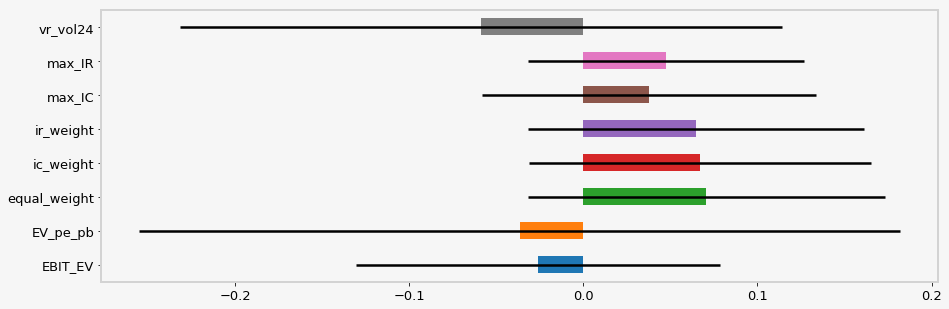

In [17]:
pd.Series(ic_20_mean).plot(kind="barh",xerr=pd.Series(ic_20_std),figsize=(15,5))

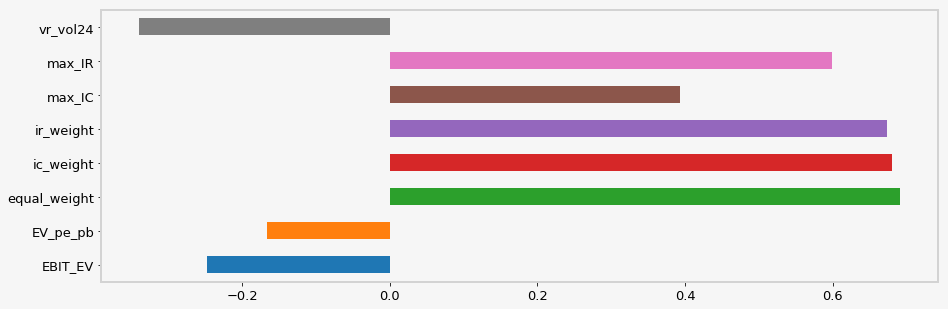

In [18]:
pd.Series(ir_20).plot(kind="barh",figsize=(15,5))

In [19]:
print(ic_20_mean["equal_weight"])
print(ic_20_mean["vr_vol24"])

0.07074607904544815
-0.058670589985228776


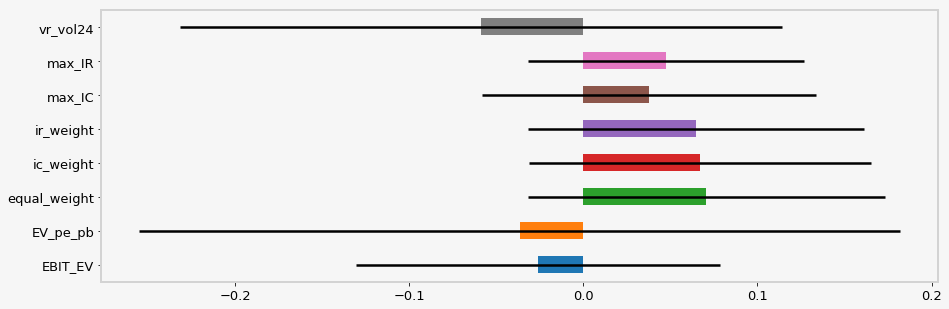

In [20]:
pd.Series(ic_20_mean).plot(kind="barh",xerr=pd.Series(ic_20_std),figsize=(15,5))

In [21]:
print(ir_20["equal_weight"])
print(ir_20["vr_vol24"])

0.6916155651614937
-0.339483713240094


e:\python\lib\site-packages\jaqs\util\numeric.py:16: RuntimeWarning: divide by zero encountered in true_divide
  res = np.floor(rank / divisor) + 1.0
e:\python\lib\site-packages\jaqs\util\numeric.py:16: RuntimeWarning: invalid value encountered in true_divide
  res = np.floor(rank / divisor) + 1.0


Nan Data Count (should be zero) : 0;  Percentage of effective data: 52%


Value of signals of Different Quantiles Statistics
                min        max      mean       std   count    count %
quantile                                                             
1        -10.438489  -0.421340 -1.317930  0.687834  237822  20.055777
2         -0.834882   0.028937 -0.432162  0.142152  237171  20.000877
3         -0.316147   0.542316 -0.010352  0.117969  237132  19.997588
4          0.036359   1.343586  0.422117  0.148523  237171  20.000877
5          0.330402  11.775893  1.360483  0.718549  236507  19.944881
Figure saved: C:\Users\Administrator\Desktop\HelloGit-master\样本内\returns_report.pdf


e:\python\lib\site-packages\numpy\lib\function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
e:\python\lib\site-packages\numpy\lib\function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
e:\python\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
e:\python\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
e:\python\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
e:\python\lib\site-packages\jaqs_fxdayu\research\signaldigger\performance.py:69: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  grouper.append(pd.TimeGrouper(by_time))


Information Analysis
                 ic
IC Mean       0.071
IC Std.       0.102
t-stat(IC)   28.156
p-value(IC)   0.000
IC Skew       0.214
IC Kurtosis   0.403
Ann. IR       0.691


e:\python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Figure saved: C:\Users\Administrator\Desktop\HelloGit-master\样本内\information_report.pdf


<Figure size 432x288 with 0 Axes>

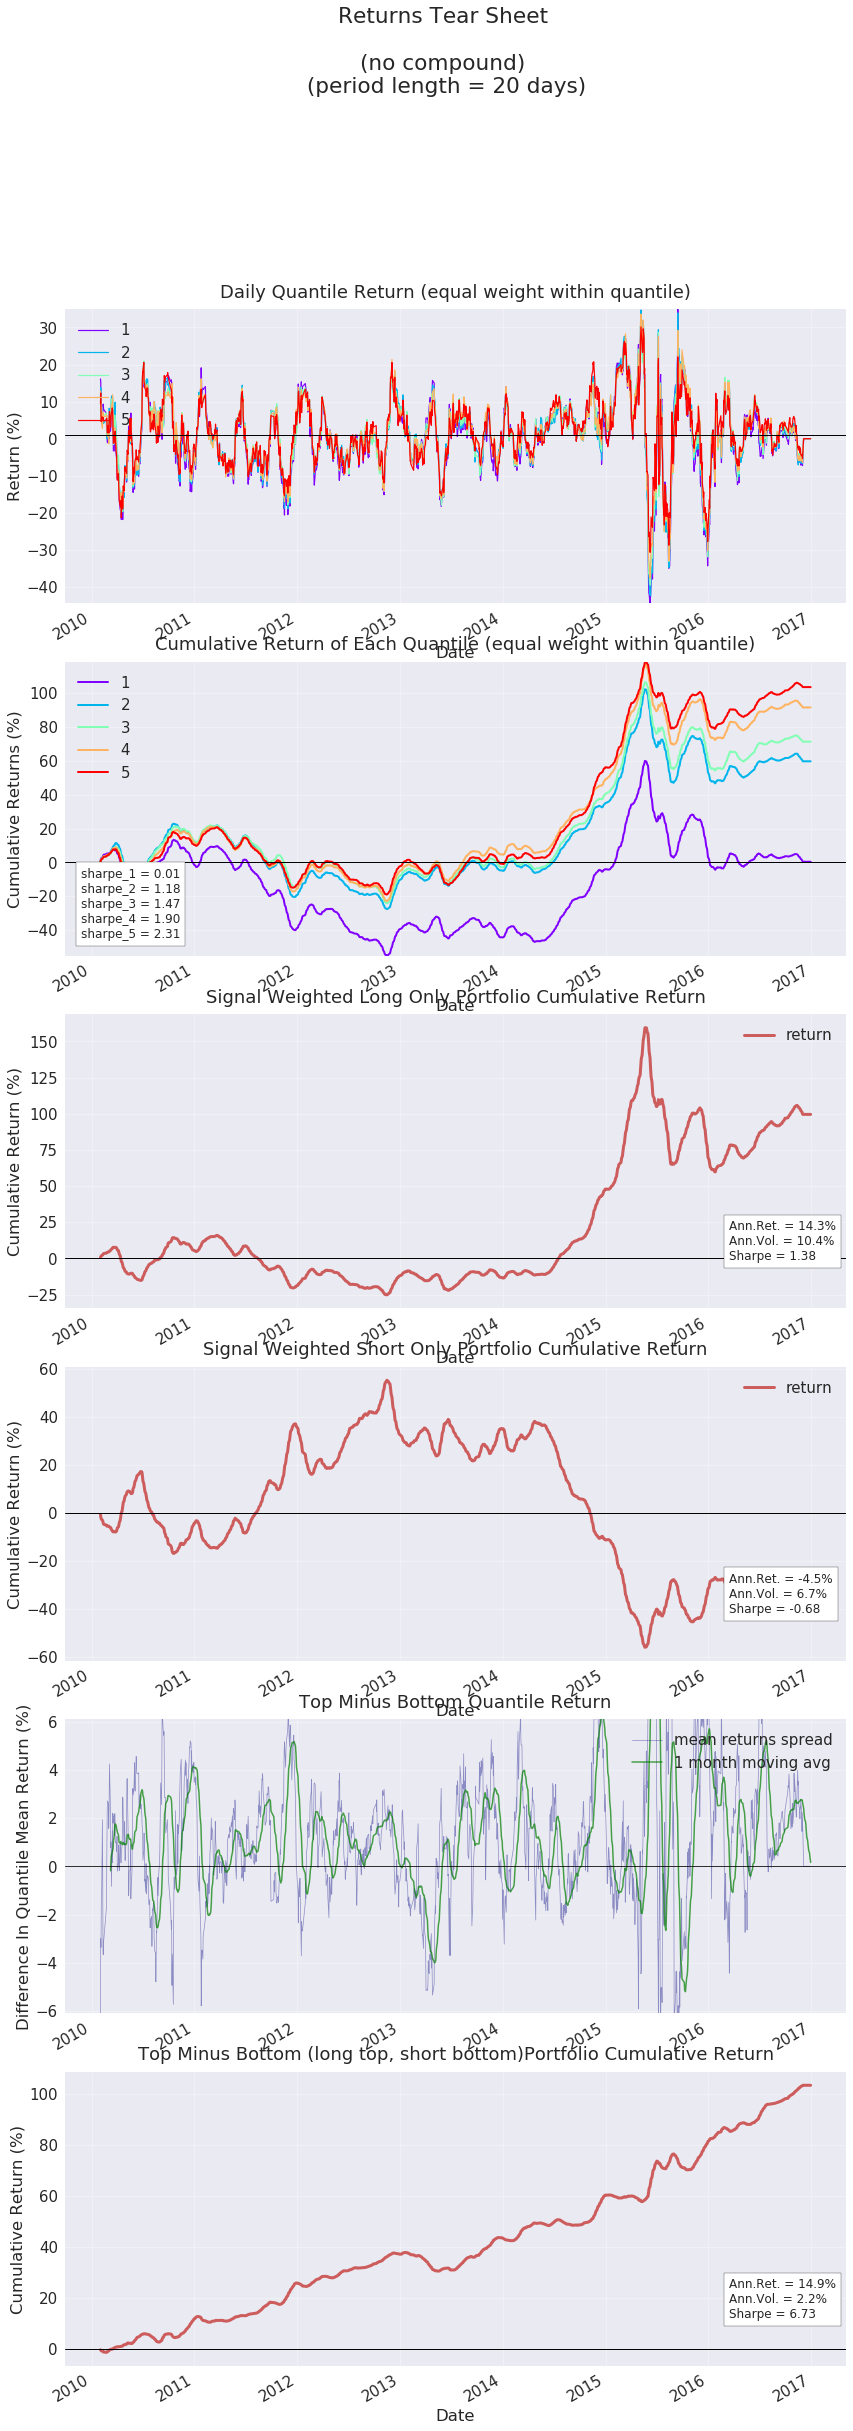

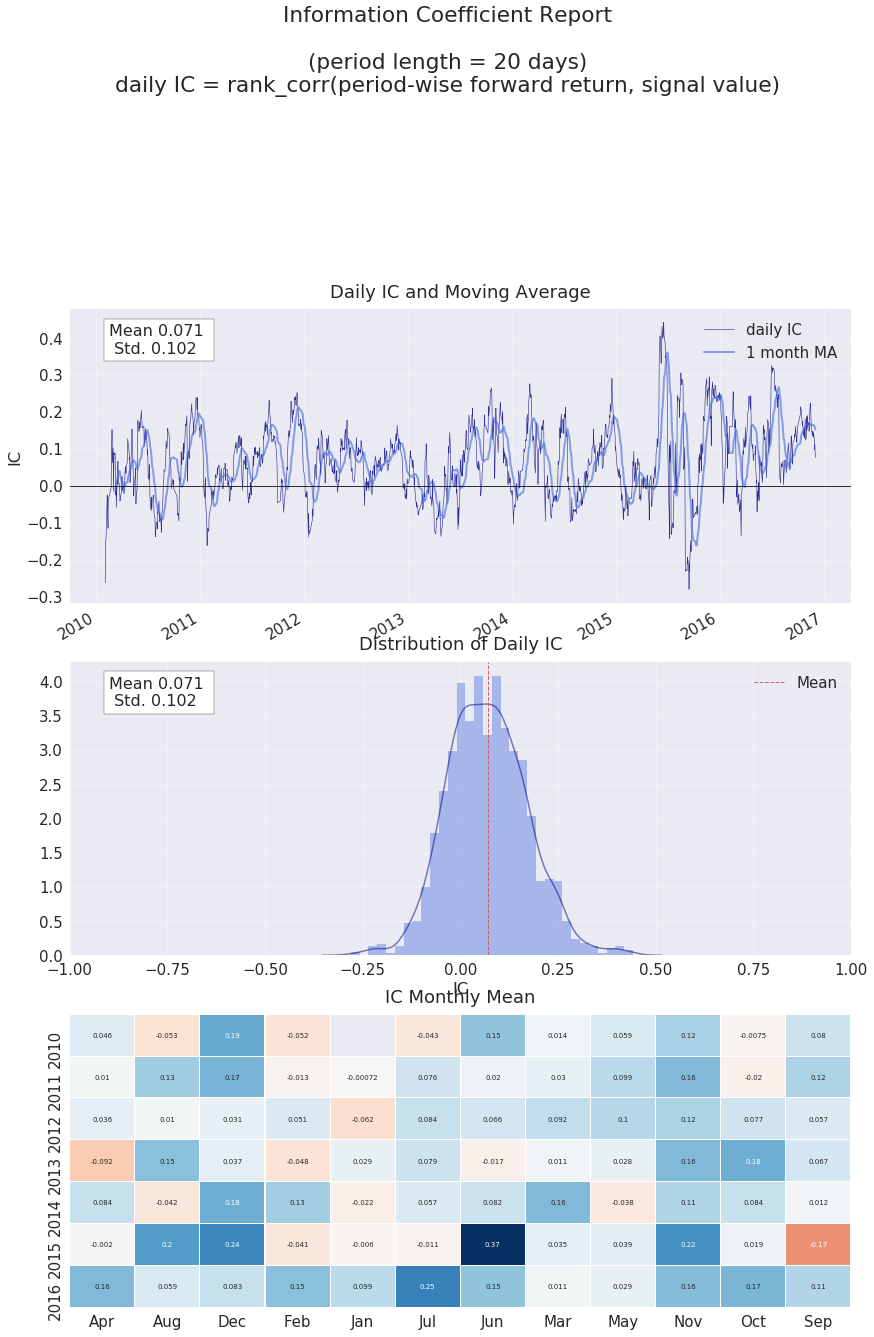

In [22]:
#查看等权合成因子的详情报告
import matplotlib.pyplot as plt
from jaqs_fxdayu.research.signaldigger.analysis import analysis
from jaqs_fxdayu.research import SignalDigger

obj = SignalDigger()
obj.process_signal_before_analysis(signal=comb_factors["equal_weight"],
                                   price=dv.get_ts("close_adj"),
                                   high=dv.get_ts("high_adj"), # 可为空
                                   low=dv.get_ts("low_adj"),# 可为空
                                   n_quantiles=5,# quantile分类数
                                   mask=mask,# 过滤条件
                                   can_enter=can_enter,# 是否能进场
                                   can_exit=can_exit,# 是否能出场
                                   period=20,# 持有期
                                   #benchmark_price=dv.data_benchmark, # 基准价格 可不传入，持有期收益（return）计算为绝对收益
                                   commission = 0.0008,
                                   )
obj.create_full_report()
plt.show()

In [23]:
#将Quantile5的选股结果保存成excel
excel_data = obj.signal_data[obj.signal_data['quantile']==5]["quantile"].unstack().replace(np.nan, 0).replace(5, 1)
print (excel_data.head())
excel_data.to_excel('./equal_weight_quantile_5.xlsx')

symbol      000001.SZ  000002.SZ  000006.SZ  000008.SZ  000009.SZ  000012.SZ  \
trade_date                                                                     
20100201          0.0        0.0        0.0        0.0        0.0        0.0   
20100202          0.0        0.0        0.0        0.0        0.0        0.0   
20100203          0.0        0.0        0.0        0.0        0.0        0.0   
20100204          0.0        0.0        0.0        0.0        0.0        0.0   
20100205          0.0        0.0        0.0        0.0        0.0        0.0   

symbol      000021.SZ  000022.SZ  000027.SZ  000028.SZ    ...      603698.SH  \
trade_date                                                ...                  
20100201          0.0        0.0        0.0        0.0    ...            0.0   
20100202          0.0        0.0        0.0        0.0    ...            0.0   
20100203          0.0        0.0        0.0        0.0    ...            0.0   
20100204          0.0        0.0       